## 1 - Packages

Let's first import all the packages that you will need during this assignment. 
- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- dnn_utils provides some necessary functions for this notebook.
- testCases provides some test cases to assess the correctness of your functions
- np.random.seed(1) is used to keep all the random function calls consistent. It will help us grade your work. Please don't change the seed. 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.python.framework import ops
import h5py
import math
import matplotlib.pyplot as plt
import scipy

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))
print("scipy version: {}".format(scipy.__version__))   

TensorFlow version: 2.1.0
Eager execution: True
scipy version: 1.4.1


In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [145]:
# Build the Sequential feedforward neural network model
model = Sequential(
    [
    InputLayer(input_shape=(64,64,3,)),
    Conv2D(4, 4, strides=(1,1), padding='SAME', activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros',name='Conv1'),
    MaxPool2D(pool_size=(8,8), strides=(8,8), padding='SAME',name='Max1'),
    Conv2D(8, 8, strides=(1,1), padding='SAME', activation='relu', kernel_initializer='glorot_uniform',bias_initializer='zeros',name='Conv2'),
    MaxPool2D(pool_size=(4,4), strides=(4,4), padding='SAME',name='Max2'),
    Flatten(name ='FC'),
    Dense(6, activation='softmax',kernel_initializer='glorot_uniform',bias_initializer='zeros',name='D')
],
name='my CNN'
)


In [146]:
model.summary()

Model: "my CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 64, 64, 4)         196       
_________________________________________________________________
Max1 (MaxPooling2D)          (None, 8, 8, 4)           0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 8, 8, 8)           2056      
_________________________________________________________________
Max2 (MaxPooling2D)          (None, 2, 2, 8)           0         
_________________________________________________________________
FC (Flatten)                 (None, 32)                0         
_________________________________________________________________
D (Dense)                    (None, 6)                 198       
Total params: 2,450
Trainable params: 2,450
Non-trainable params: 0
__________________________________________________________

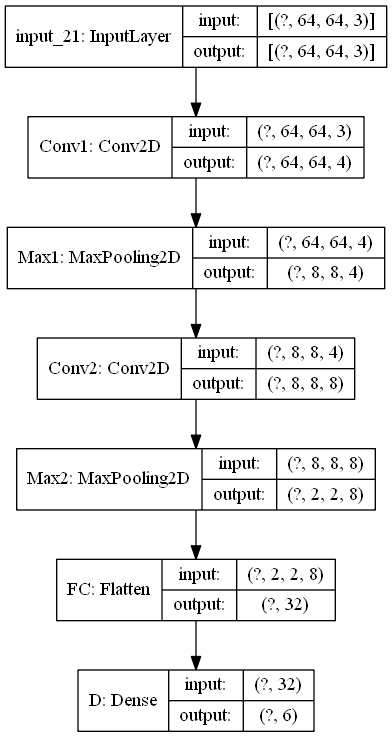

In [154]:
tf.keras.utils.plot_model(model, to_file='models/model.png',show_shapes=True)

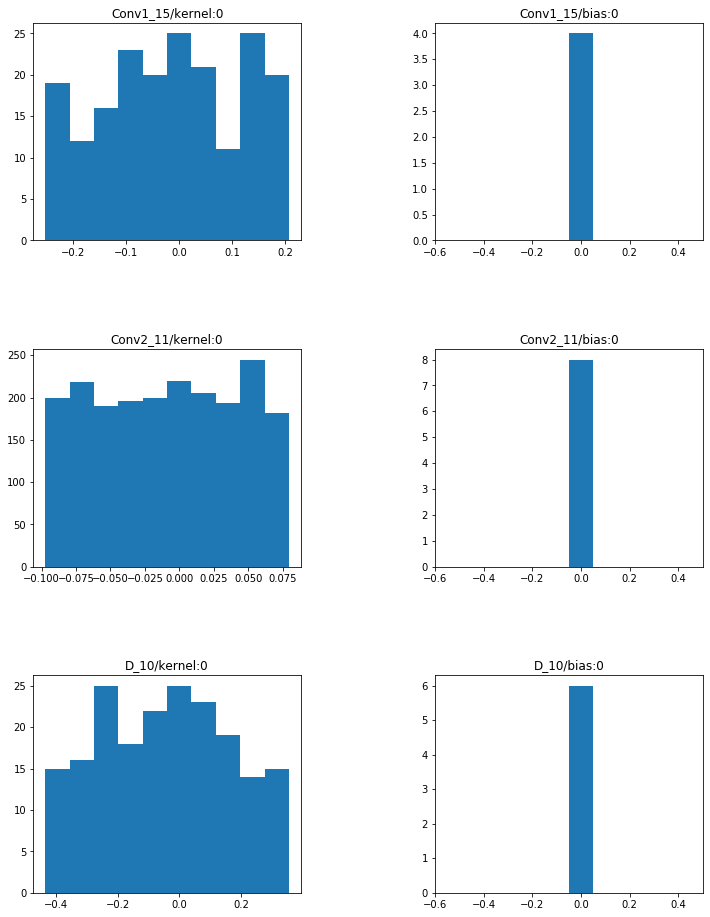

In [165]:
# Plot histograms of weight and bias values
# Filter out the pooling and flatten layers, that don't have any weights

weight_layers = [layer for layer in model.layers if len(layer.weights) > 0] 
fig, axes = plt.subplots(len(weight_layers), 2, figsize=(12,16))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, layer in enumerate(weight_layers):
    for j in [0, 1]:
        axes[i, j].hist(layer.weights[j].numpy().flatten(), align='left')
        axes[i, j].set_title(layer.weights[j].name)

In [160]:
model.compile (
#    optimizer=tf.keras.optimizers.SGD(learning_rate=0.0075),
    optimizer=tf.keras.optimizers.Adam(),
    loss= tf.keras.losses.CategoricalCrossentropy(),
    metrics= [tf.keras.metrics.BinaryAccuracy()]
)

In [101]:
def load_dataset_signs():
    train_dataset = h5py.File('datasets/train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [102]:
train_x_orig, train_y_orig, test_x_orig, test_y_orig, classes = load_dataset_signs()

In [103]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

y = 2. It's a 2 picture.


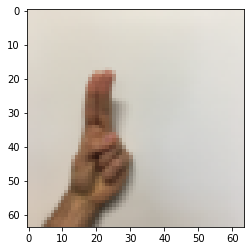

In [104]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y_orig[0,index]) + ". It's a " + str(classes[train_y_orig[0,index]]) +  " picture.")

In [105]:
train_x = train_x_orig.astype(np.float32)/255.
test_x = test_x_orig.astype(np.float32)/255.
train_y = convert_to_one_hot(train_y_orig, 6).T
train_y = train_y.astype(np.float32)
test_y = convert_to_one_hot(test_y_orig, 6).T
test_y = test_y.astype(np.float32)
print ("number of training examples = " + str(train_x.shape[0]))
print ("number of test examples = " + str(test_x.shape[0]))
print ("train_x shape: " + str(train_x.shape))
print ("train_x dtype: " + str(train_x.dtype))
print ("train_y shape: " + str(train_y.shape))
print ("train_y dtype: " + str(train_y.dtype))
print ("test_x shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))
conv_layers = {}

number of training examples = 1080
number of test examples = 120
train_x shape: (1080, 64, 64, 3)
train_x dtype: float32
train_y shape: (1080, 6)
train_y dtype: float32
test_x shape: (120, 64, 64, 3)
test_y shape: (120, 6)


In [106]:
# Fit the model
history=model.fit(train_x,train_y ,epochs= 100,batch_size =64)

Train on 1080 samples
Epoch 1/100
1080/1080 [==============================] - 1s 1ms/sample - loss: 1.8278 - binary_accuracy: 0.8333
Epoch 2/100
1080/1080 [==============================] - 1s 879us/sample - loss: 1.7619 - binary_accuracy: 0.8333s - loss: 1.7649 - binary_accuracy: 0.
Epoch 3/100
1080/1080 [==============================] - 1s 873us/sample - loss: 1.7383 - binary_accuracy: 0.8333
Epoch 4/100
1080/1080 [==============================] - 1s 866us/sample - loss: 1.7003 - binary_accuracy: 0.8333
Epoch 5/100
1080/1080 [==============================] - 1s 901us/sample - loss: 1.6646 - binary_accuracy: 0.8333
Epoch 6/100
1080/1080 [==============================] - 1s 904us/sample - loss: 1.6088 - binary_accuracy: 0.8333
Epoch 7/100
1080/1080 [==============================] - 1s 951us/sample - loss: 1.5502 - binary_accuracy: 0.8333
Epoch 8/100
1080/1080 [==============================] - 1s 893us/sample - loss: 1.4864 - binary_accuracy: 0.8333
Epoch 9/100
1080/1080 [=======

1080/1080 [==============================] - 1s 813us/sample - loss: 0.2251 - binary_accuracy: 0.9776
Epoch 72/100
1080/1080 [==============================] - 1s 824us/sample - loss: 0.2215 - binary_accuracy: 0.9801
Epoch 73/100
1080/1080 [==============================] - 1s 817us/sample - loss: 0.2179 - binary_accuracy: 0.9809
Epoch 74/100
1080/1080 [==============================] - 1s 806us/sample - loss: 0.2084 - binary_accuracy: 0.9804
Epoch 75/100
1080/1080 [==============================] - 1s 815us/sample - loss: 0.1966 - binary_accuracy: 0.9832
Epoch 76/100
1080/1080 [==============================] - 1s 825us/sample - loss: 0.1981 - binary_accuracy: 0.9830
Epoch 77/100
1080/1080 [==============================] - 1s 815us/sample - loss: 0.1894 - binary_accuracy: 0.9829
Epoch 78/100
1080/1080 [==============================] - 1s 820us/sample - loss: 0.1941 - binary_accuracy: 0.9818
Epoch 79/100
1080/1080 [==============================] - 1s 821us/sample - loss: 0.1965 - bi

In [107]:
# Load the history into a pandas Dataframe
import pandas as pd

df = pd.DataFrame(history.history)

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

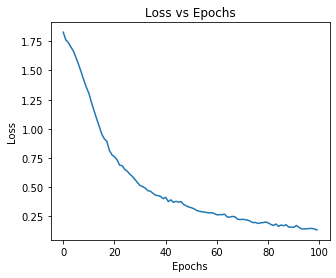

In [170]:
# Make a plot for the loss
loss_plot = df.plot(y='loss',title='Loss vs Epochs',kind='line',legend = False)
loss_plot.set(xlabel ="Epochs", ylabel="Loss")

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

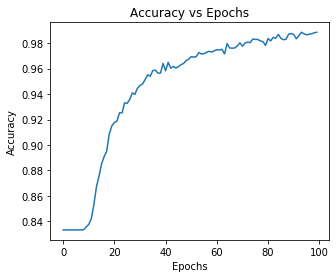

In [171]:
# Make a plot for the Accuracy
accuracy_plot = df.plot(y='binary_accuracy',title='Accuracy vs Epochs',kind='line',legend = False)
accuracy_plot.set(xlabel ="Epochs", ylabel="Accuracy")

In [110]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_x,test_y)

120/120 [==============================] - 0s 996us/sample - loss: 0.2970 - binary_accuracy: 0.9639


original shape:  (213, 237, 3)
new shape:  (1, 64, 64, 3)
[[8.7710455e-02 1.1659826e-01 7.9515082e-01 6.1998966e-05 7.9226069e-05
  3.9927894e-04]]
your L-layer model predicts a "2" picture.


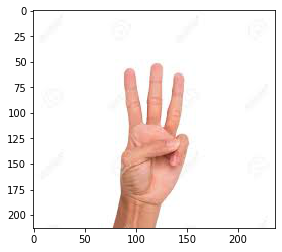

In [113]:
import imageio
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

my_image = "sign3.jpg" # change this to the name of your image file 
fname = "images/" + my_image
im = imageio.imread(fname, as_gray=False)
print("original shape: " , im.shape)

image_resized = tf.expand_dims(resize(im, (64, 64),preserve_range=True),0)
image_resized = image_resized/255.
print("new shape: ", image_resized.shape)

my_predicted_image = model.predict(image_resized)
print(my_predicted_image)
y_hat = np.argmax(my_predicted_image)

plt.imshow(im)
print ("your L-layer model predicts a \"" + str(classes[y_hat]) +  "\" picture.")

original shape:  (64, 64, 3)
new shape:  (1, 64, 64, 3)
[[4.1195758e-06 2.7131361e-07 5.2817645e-03 8.0163735e-01 9.4520971e-02
  9.8555505e-02]]
your L-layer model predicts a "3" picture.


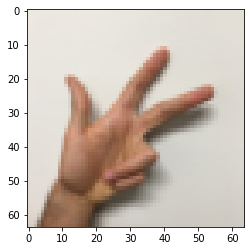

In [114]:
im= test_x_orig[12]
print("original shape: " , im.shape)

image_resized = tf.expand_dims(resize(im, (64, 64),preserve_range=True),0)
image_resized = image_resized/255.
print("new shape: ", image_resized.shape)

my_predicted_image = model.predict(image_resized)
print(my_predicted_image)
y_hat = np.argmax(my_predicted_image)

plt.imshow(im)
print ("your L-layer model predicts a \"" + str(classes[y_hat]) +  "\" picture.")